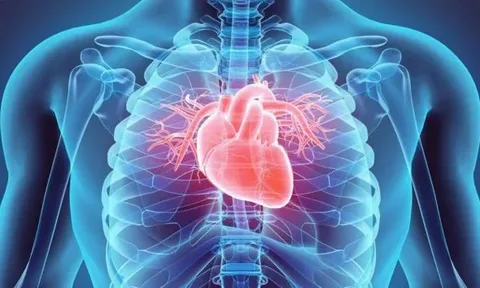

First of all, ***Heart disease*** is a major global health issue that involves the narrowing or blockage of blood vessels, often due to plaque buildup (atherosclerosis). Key risk factors include high blood pressure, high cholesterol, smoking, obesity, and lack of exercise. From biological perspective, it can lead to chest pain, heart attacks, or arrhythmias, and is influenced by both genetic and lifestyle factors. Biomarkers like LDL, CRP, and troponin are used to assess risk and damage.

On the other hand, ***The UCI Heart Disease*** dataset, from the Cleveland Clinic is widely used in ML to predict heart disease. It contains 303 patient records with clinical features such as age, sex, cholesterol, and blood pressure. The goal is to classify the presence or absence of heart disease. This dataset helps researchers build predictive models that support early diagnosis and treatment planning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names = columns)

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


After importing necessary libraries, we should load our *Credit Card Dataset ( [UCI dataset link](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data))*

In [ ]:
data.replace('?', np.nan, inplace = True)

We have to replace '?' with NaN (NULL values) for missing value handling using numpy library.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

<Axes: >

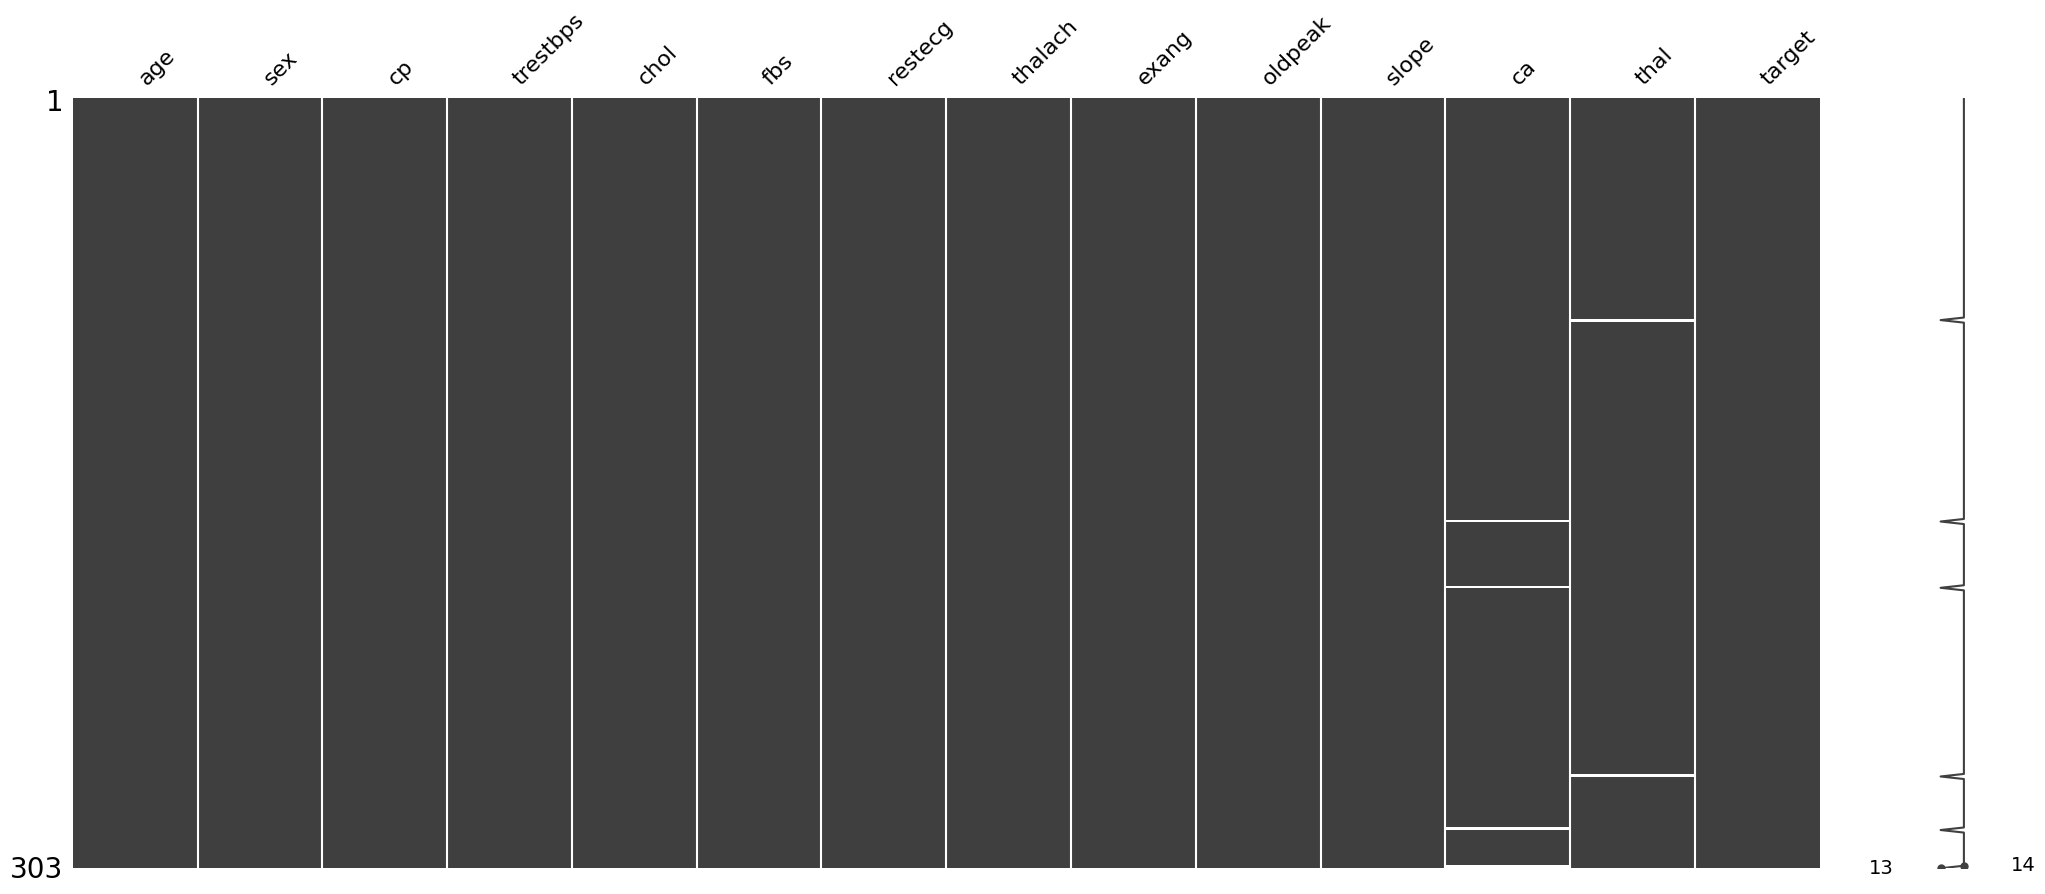

In [ ]:
ms.matrix(data)

*missingo* is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

In [ ]:
data['ca'] = pd.to_numeric(data['ca'], errors = 'coerce')
data['thal'] = pd.to_numeric(data['thal'], errors = 'coerce')

We should convert 'ca' and 'thal' columns to numeric because the data type is "object" for both of them. In addition, we can change them using pandas library easily.

*Note*: errors = 'coerce' in Pandas: if a value cannot be converted to a number (i.e., it's a string like '?'), replace it with NaN (Not a Number).

In [ ]:
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

In the dataset, the target variable represents the presence and severity of heart disease, with values ranging from 0 to 4. A value of 0 indicates the absence of heart disease, while values 1 through 4 correspond to varying degrees of the condition. For the purpose of simplifying the problem into a binary classification task, it is common practice to group all non-zero values into a single category representing the presence of heart disease.

The line of the code performs this transformation. It maps all values greater than 0 to 1, indicating the presence of disease, and retains 0 for the absence of disease. This binary representation is essential for training classification models that distinguish between individuals with and without heart disease, thereby improving model interpretability and reducing complexity.

In [ ]:
#Our target column will be "target", however before creating x and y, let's count its values;

print(data['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


First of all, let's explain the column explicitly, in here we have 2 values (0 and 1)

0 -> the transaction is the absence of disease.
1 -> the transaction is the presence of disease.

In [ ]:
# Split data into features and target

y = data['target']
x = data.drop(columns = 'target')

print(x.columns)

# Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())])

# Apply preprocessing to all features
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())])

To begin with, the code defines preprocessing steps for handling numerical features in a ML pipeline. Preprocessing is a critical phase in data preparation, particularly when working with numerical data that may contain missing values or varying scales. The pipeline is constructed using *Pipeline* from the *sklearn.pipeline* module and includes two main operations: **imputation and scaling**.

1) The first part of the code creates a pipeline specifically for numerical features:

This pipeline, referred to as *numeric_transformer*, performs two preprocessing tasks in sequence:

a. ***Imputation***: The first step uses *SimpleImputer* with the strategy set to 'mean'. This replaces any missing values in the numerical data with the mean value of the corresponding column. Imputation is necessary because many machine learning algorithms cannot handle missing values directly.

b. ***Scaling***: The second step applies *StandardScaler*, which standardizes the features by removing the mean and scaling to unit variance. This transformation ensures that each numerical feature has a mean of zero and a standard deviation of one. Scaling is particularly important when features are measured on different scales, as it helps algorithms such as logistic regression, support vector machines, and neural networks perform more effectively.

2) The second part of the code appears to replicate the same pipeline:

In this instance, the pipeline is assigned to the variable *preprocessor*, which suggests it may be used more generally for applying preprocessing steps across all features in the dataset, not just numerical ones. However, since the steps in both pipelines are identical and only involve numerical transformations, the *preprocessor* here serves the same purpose as *numeric_transformer*.

In practice, a more complete preprocessing pipeline would differentiate between numerical and categorical features using *ColumnTransformer*, allowing different transformations to be applied to each type. Nevertheless, the code above lays the foundation for processing numerical inputs by ensuring that missing values are handled and that all features are on a comparable scale before being passed to a machine learning model.

In addition, let's talk about;

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


In [ ]:
# build 3 models

models = {
    'Logistic Regression': LogisticRegression(random_state = 0),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state = 1)}

In [ ]:
# Hyperparameter tuning

params = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']},

    'KNN': {'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']},

    'Decision Tree': {'model__max_depth': [3, 5, 7, None],
        'model__min_samples_split': [2, 5, 10]}}


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



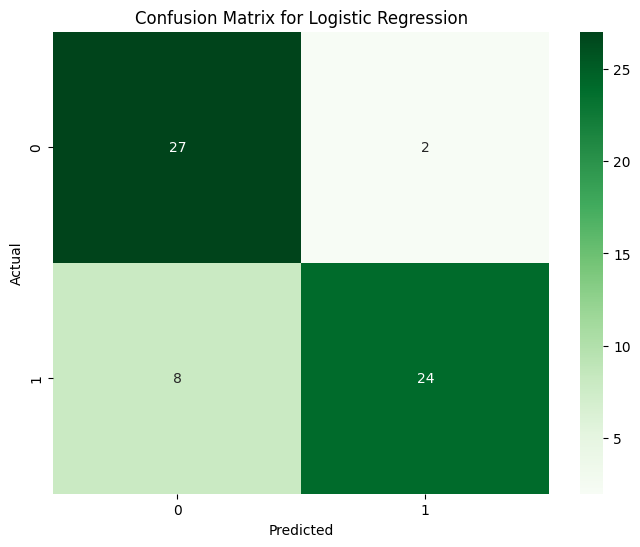


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



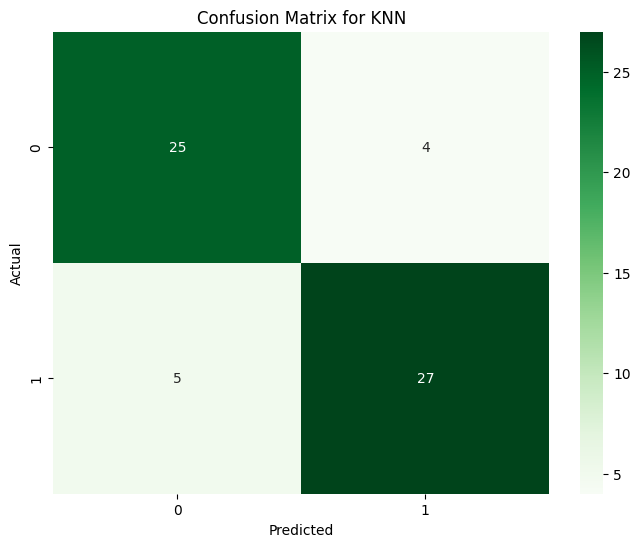


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



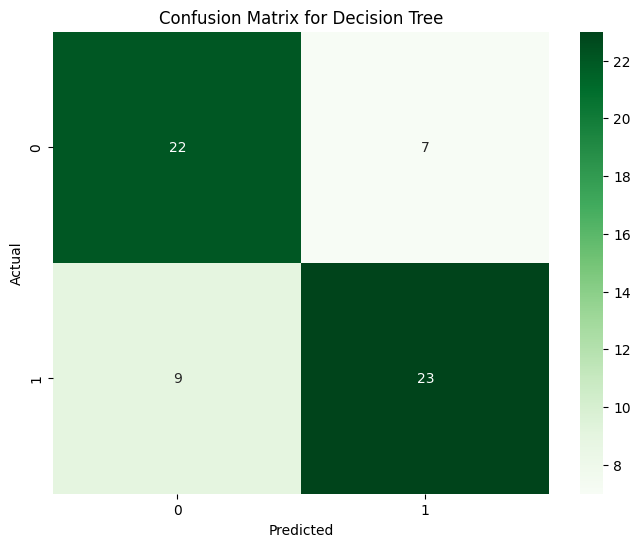

In [ ]:
results = {}
confusion_matrices = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

    # GridSearchCV
    grid = GridSearchCV(pipeline, params[model_name], cv = 5, scoring = 'accuracy', n_jobs = -1)
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_
    pred = best_model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, pred)

    # Results
    results[model_name] = {'best_params': grid.best_params_, 'accuracy': acc}

    # CM
    confusion_matrices[model_name] = confusion_matrix(y_test, pred)

    # CR
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, pred))

    # Plot confusion matrix
    plt.figure(figsize = (8, 6))
    sns.heatmap(confusion_matrices[model_name], annot = True, fmt = 'd', cmap = 'Greens')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 1)**Logistic Regression**

Logistic Regression is a statistical method used for binary classification problems. Unlike linear regression, which predicts continuous outcomes, logistic regression estimates the probability that a given input belongs to a particular class. The model is based on the logistic (sigmoid) function, which maps any real-valued number to the range between 0 and 1.

*Formula: * $P(y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}$

In here,

* $P(y=1 \mid X)$ is the probability that the target variable $y$ equals 1, given the input features $X$.
* $\beta_0$ is the intercept (bias).
* $\beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights) associated with the features $x_1, x_2, ..., x_n$.
* $e$ is the base of the natural logarithm.

The model is trained using a method called **maximum likelihood estimation**, which finds the values of the coefficients that maximize the likelihood of observing the given data. To make a classification decision, a threshold (typically 0.5) is applied to the predicted probability. If the probability is greater than or equal to the threshold, the observation is classified as class 1; otherwise, it is classified as class 0.

# 2)**K-Nearest Neighbors (KNN)**

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, instance-based learning method used for both classification and regression tasks. In classification, KNN determines the class of a data point by looking at the classes of its $k$ closest neighbors in the training set.

*Formula: *$d(x, x') = \sqrt{(x_1 - x'_1)^2 + (x_2 - x'_2)^2 + \cdots + (x_n - x'_n)^2}$

In here,

* $x$ is the feature vector of the test sample.
* $x'$ is the feature vector of a training sample.
* $d(x, x')$ is the distance between the two vectors.

In the same way, the algorithm follows these steps:

1. Choose the number of neighbors $k$.
2. Calculate the distance between the test point and all training samples.
3. Identify the $k$ closest samples.
4. Assign the class label that is most frequent among these neighbors.

KNN is simple and effective but can be computationally expensive for large datasets since it requires calculating distances for every prediction. It is also sensitive to the scale of the data, which is why feature scaling is important when using KNN.

# 3) **Decision Tree**

A Decision Tree is a supervised learning algorithm that can be used for both classification and regression. It models data by learning simple decision rules inferred from the input features. The tree is constructed by recursively splitting the dataset into subsets based on feature values that result in the best separation of classes. Moreover, the quality of a split is evaluated using metrics such as **Gini Impurity** or **Information Gain**.

*Formula: *$Gini = 1 - \sum_{i=1}^{C} p_i^2$

In here,

* $C$ is the number of classes.
* $p_i$ is the proportion of samples belonging to class $i$ in the node.

Alternatively, **Entropy** and **Information Gain** may be used:

*Formula: *$Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)$
*Formula: *$
Information\ Gain = Entropy_{parent} - \sum_{j=1}^{k} \frac{N_j}{N} \cdot Entropy_j$

In here,

* $Entropy_{parent}$ is the entropy before the split.
* $Entropy_j$ is the entropy of the child node $j$.
* $N_j$ is the number of samples in child node $j$, and $N$ is the total number of samples.

A decision tree continues splitting the data until a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf. The resulting model is interpretable, as the prediction path can be traced from the root to a leaf node based on feature conditions.

# 4) Confusion Matrix

A confusion matrix is a table that shows how well your model did at predicting stuff, like frauds (Class=1) versus non-frauds (Class=0). It compares what your model predicted to what’s actually true, breaking it down into four boxes; true positives, true negatives, false positives, and false negatives. It’s super useful for fraud detection task because it shows how good XGBoost model is at catching frauds without flagging too many non-frauds.

* *True Positives (TP):* Model says fraud, and it’s actually fraud.
* *True Negatives (TN):* Model says non-fraud, and it’s actually non-fraud.
* *False Positives (FP):* Model says fraud, but it’s non-fraud.
* *False Negatives (FN):* Model says non-fraud, but it’s actually fraud.

From this, we can calculate;

* *Recall* = TP / (TP + FN)
* *Precision* = TP / (TP + FP)
* *F1 Score:* Balances precision and recall.

# 5) **Classification Report**

A classification report is a comprehensive summary of the performance of a classification model. It is commonly used to evaluate how well the model is able to predict categorical outcomes, especially in binary or multi-class classification problems. The report includes several key evaluation metrics: **precision**, **recall**, **F1-score**, and **support**. These metrics are calculated for each class individually and provide a deeper understanding of the model’s strengths and weaknesses beyond simple accuracy.

* **Precision**

Precision measures the proportion of positive predictions that are actually correct. It answers the question: *Of all the instances the model predicted as positive, how many were truly positive?*

*Formula: *$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

High precision indicates a low false positive rate, which is important in applications where false alarms must be minimized.

* **Recall (Sensitivity or True Positive Rate)**

Recall measures the proportion of actual positive cases that were correctly identified by the model. It answers the question: *Of all the true positive instances, how many did the model capture?*

*Formula: *$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

High recall indicates that the model captures most of the positive cases, which is crucial in scenarios where missing positive cases is costly.

* **F1-Score**

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. This metric is especially useful when the class distribution is imbalanced.

*Formula: *$\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

A high F1-score indicates that the model performs well in both identifying relevant instances and avoiding false positives.

* **Support**

Support refers to the number of actual occurrences of each class in the dataset. It provides context for interpreting precision, recall, and F1-score by indicating how many instances the model was evaluated on for each class.

* **Overall Metrics**

In addition to per-class metrics, the classification report typically includes aggregate scores such as:

* **Macro Average**: The arithmetic mean of the metric scores for each class, treating all classes equally.
* **Weighted Average**: The mean of the metric scores weighted by the support of each class, giving more influence to classes with more instances.
* **Accuracy**: The ratio of correctly predicted instances to the total number of instances.

*Formula: * $\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$

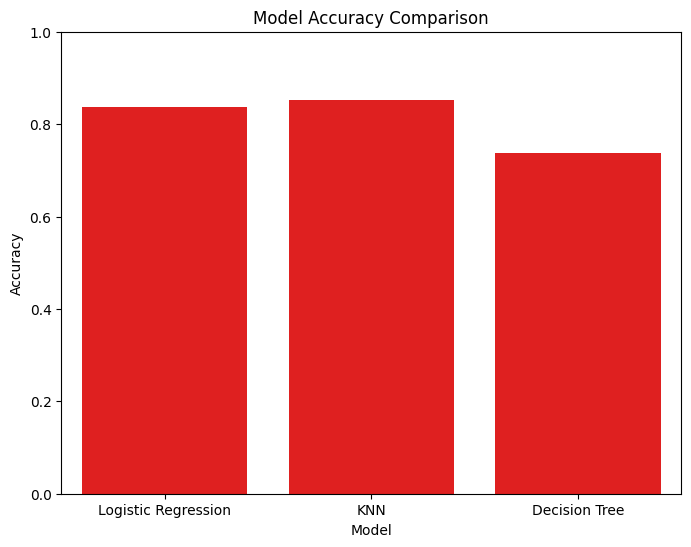

In [ ]:
# Plot accuracy comparison
plt.figure(figsize = (8, 6))
accuracies = [result['accuracy'] for result in results.values()]
model_names = list(results.keys())

sns.barplot(x = model_names, y = accuracies, color = 'red')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

In conclusion, this project developed a classification model to predict heart disease using the UCI Heart Disease dataset, employing Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree algorithms. The dataset, with all features treated as numerical (post-preprocessing), underwent comprehensive preprocessing, including mean imputation for missing values and standard scaling. Hyperparameter tuning was performed using GridSearchCV to optimize each model's performance.

The results demonstrate that KNN achieved the highest accuracy at 85%, followed closely by Logistic Regression at 84%, while the Decision Tree model yielded the lowest accuracy at 74%. The superior performance of KNN suggests it effectively captured the underlying patterns in the scaled numerical features, likely due to its ability to model non-linear relationships in the data. Logistic Regression also performed robustly, indicating that the data may have linearly separable characteristics after preprocessing. The Decision Tree's lower accuracy could stem from overfitting or sensitivity to the numerical treatment of inherently categorical features, which might have introduced artificial ordinality.

Furthermore,the confusion matrices and classification reports further highlight each model's strengths and weaknesses in handling true positives and negatives, with KNN and Logistic Regression showing balanced precision and recall for this binary classification task. Treating all features as numerical simplified preprocessing but may have impacted model performance, particularly for the Decision Tree, as categorical features like sex and cp are typically better suited for one-hot encoding to avoid implying ordinal relationships.

As a result, KNN is recommended as the best-performing model for this dataset.

In [ ]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

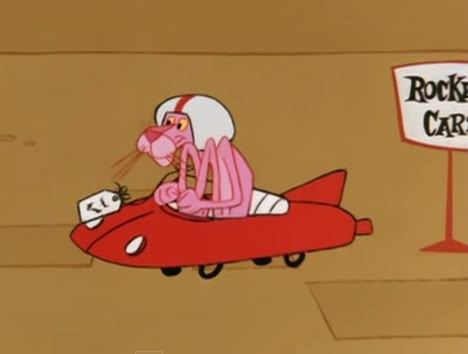